In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score



### Loading Dataset

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Data Preprocessing

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
## Dropping _c39 as it has maximum nulls and of no use for our analysis

In [6]:
df.drop('_c39',axis='columns', inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [8]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_bind_date,1000,951,1992-08-05,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2015-02-02,28
incident_type,1000,4,Multi-vehicle Collision,419


In [9]:
## We can convert date fields from object to date datatype 

In [7]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [8]:
# columns with ? entries
df.columns[(df == '?').any()]

c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [9]:
df[df.columns[(df == '?').any()]].nunique()

c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [13]:
## We can replace ?  with unknown

In [10]:
df['police_report_available'] = df['police_report_available'].replace("?", "unknown")
df['collision_type'] = df['collision_type'].replace("?", "unknown")
df['property_damage'] = df['property_damage'].replace("?", "unknown")


In [15]:
### Check for outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'months_as_customer'),
  Text(2, 0, 'age'),
  Text(3, 0, 'policy_number'),
  Text(4, 0, 'policy_deductable'),
  Text(5, 0, 'policy_annual_premium'),
  Text(6, 0, 'umbrella_limit'),
  Text(7, 0, 'insured_zip'),
  Text(8, 0, 'capital-gains'),
  Text(9, 0, 'capital-loss'),
  Text(10, 0, 'incident_hour_of_the_day'),
  Text(11, 0, 'number_of_vehicles_involved'),
  Text(12, 0, 'bodily_injuries'),
  Text(13, 0, 'witnesses'),
  Text(14, 0, 'total_claim_amount'),
  Text(15, 0, 'injury_claim'),
  Text(16, 0, 'property_claim'),
  Text(17, 0, 'vehicle_claim'),
  Text(18, 0, 'auto_year')])

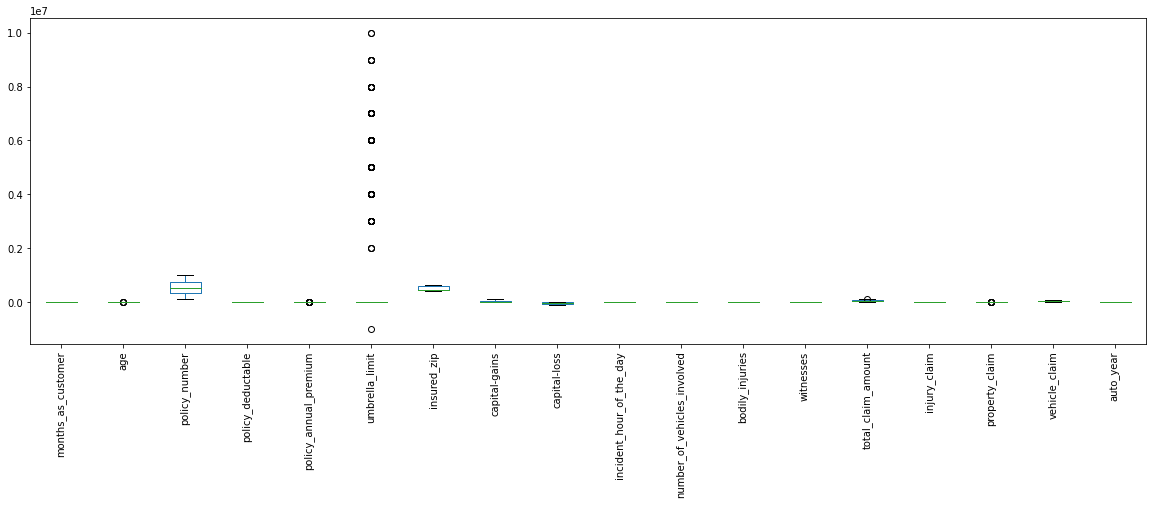

In [10]:
df.plot.box(figsize = (20,6))
plt.xticks(rotation = 90)

In [11]:
df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [12]:
df['umbrella_limit'].sort_values(ascending=False)

115    10000000
430    10000000
975     9000000
458     9000000
657     9000000
         ...   
625           0
624           0
623           0
0             0
290    -1000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [17]:
# limit can never be -ve , hence updating -ve umbrella limit to 0

In [11]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [21]:
## Distribution of Target Variable

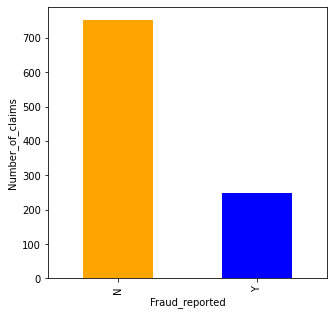

In [14]:

ax = pd.value_counts(df['fraud_reported']).plot.bar(color=['orange', 'blue'], figsize=(5,5))
ax.set_xlabel('Fraud_reported')
ax.set_ylabel('Number_of_claims')
plt.show()

In [23]:
## As we can see Target variable is imbalanced , we will handle this before training

In [15]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
unknown            178
Name: collision_type, dtype: int64

In [16]:
#### We need label encoding for all features which are not numeric ,Let's start with data type object

In [17]:
## check for columns of object data type

In [18]:
def object_datatype_report(df):
    feature_name =[]
    distinct_count=[]
    for col in df:
        if df[col].dtype == 'object':
            feature_name.append(str(col)) 
            distinct_count.append(df[col].nunique())

    object_type_features = pd.DataFrame()
    object_type_features['feature_name'] = feature_name
    object_type_features['distinct_count']= distinct_count
            
    object_type_features=object_type_features.sort_values('distinct_count',ascending=False)
    return object_type_features

In [19]:
object_datatype_report(df)

,feature_name,distinct_count
13,incident_location,1000
17,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
16,auto_make,14
3,insured_education_level,7
11,incident_state,7
12,incident_city,7
6,insured_relationship,6
10,authorities_contacted,5


In [20]:
# Based on above result we can see drop columns having maximum unique values
# As this will not help in generalizing model

In [12]:
df=df.drop(['incident_location','policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','auto_make','auto_model'],axis=1)

In [22]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported'],
      dtype='object')

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,unknown,0,0,unknown,5070,780,780,3510,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,unknown,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [24]:
## Now we can apply label encoding for remaining columns

In [13]:
df=pd.get_dummies(df,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','property_damage','police_report_available'],drop_first=True)

In [26]:
df.shape

(1000, 90)

In [27]:
## We can encode target_variable as well

In [14]:
df["fraud_reported"]= df["fraud_reported"].map({"N":0, "Y":1})

In [15]:
X=df.drop(['fraud_reported'],axis='columns')


In [16]:
y=df['fraud_reported']

In [17]:
scaling_obj=StandardScaler()
X_scal = scaling_obj.fit_transform(X)

### Model Training

In [18]:
def label_prediction(model, X_test):
    predicted_values = model.predict(X_test)
    return predicted_values

In [19]:
def calculate_metrics(model, X_train, X_test, Y_test, y_train):
    predicted_y_test = label_prediction(model, X_test)
    training_accuracy = accuracy_score(y_train, label_prediction(model,X_train))
    testing_accuracy = accuracy_score(Y_test, predicted_y_test)
    conf_matrix = confusion_matrix(Y_test, predicted_y_test)
    cls_report = classification_report(Y_test, predicted_y_test)
    return training_accuracy, testing_accuracy, conf_matrix,cls_report
     
    

In [20]:
def model_statictics(model_conf_matrix):
    a = model_conf_matrix[0][0]
    b = model_conf_matrix[1][0]
    c = model_conf_matrix[0][1]
    d = model_conf_matrix[1][1]
    p1 = a + b
    p2 = a + c
    q1 = c + d
    q2 = b + d
    k = [2* (a*d - b*c) / (p1*q2 +p2*q1)]
    sensitivity = a / (a+ c)
    specificity = 1- (b / (b+d))
    return k, specificity, sensitivity
    
        
    

In [21]:
def print_metrics(model_metrics, model_name,model_statictics):
    print(f"Training Accuracy of {model_name} is {round(model_metrics[0]* 100,3)}%")
    print(f"Testing Accuracy of {model_name} is {round(model_metrics[1] * 100,3)}%")
    print(f"Confusion matrix of {model_name} is\n {model_metrics[2]}")
    print(f"Classification report for {model_name} is \n {model_metrics[3]}")
    print(f"Cohen Kappa Score for {model_name} is {model_statictics[0]}")
    print(f"Sensitivity for {model_name} is {model_statictics[2]}")
    print(f"Specificity for {model_name} is {model_statictics[1]}")

## Basic Models without any tunning

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_scal, y, test_size=0.2)

#### SVM

In [27]:
svc = SVC(C=1.0,kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 89.75%
Testing Accuracy of SVM is 80.5%
Confusion matrix of SVM is
 [[132  17]
 [ 22  29]]
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       149
           1       0.63      0.57      0.60        51

    accuracy                           0.81       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.80      0.81      0.80       200

Cohen Kappa Score for SVM is [0.46967636660320916]
Sensitivity for SVM is 0.8859060402684564
Specificity for SVM is 0.5686274509803921


#### KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )


Training Accuracy of KNN is 77.875%
Testing Accuracy of KNN is 76.0%
Confusion matrix of KNN is
 [[145   4]
 [ 44   7]]
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       149
           1       0.64      0.14      0.23        51

    accuracy                           0.76       200
   macro avg       0.70      0.56      0.54       200
weighted avg       0.73      0.76      0.70       200

Cohen Kappa Score for KNN is [0.14878524561092393]
Sensitivity for KNN is 0.9731543624161074
Specificity for KNN is 0.13725490196078427


### Decision Tree

In [29]:
dt_model = DecisionTreeClassifier()
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )

Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 77.0%
Confusion matrix of dt_model is
 [[126  23]
 [ 23  28]]
Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       149
           1       0.55      0.55      0.55        51

    accuracy                           0.77       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.77      0.77      0.77       200

Cohen Kappa Score for dt_model is [0.3946571917357547]
Sensitivity for dt_model is 0.8456375838926175
Specificity for dt_model is 0.5490196078431373


In [30]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rand_clf=rand_clf.fit(X_train, y_train)
#y_pred = rand_clf.predict(X_test)
label_prediction(rand_clf, X_test )
randforest_metrics = calculate_metrics(rand_clf, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree',rand_statistics )

Training Accuracy of Random Forest Tree is 99.5%
Testing Accuracy of Random Forest Tree is 75.0%
Confusion matrix of Random Forest Tree is
 [[141   8]
 [ 42   9]]
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       149
           1       0.53      0.18      0.26        51

    accuracy                           0.75       200
   macro avg       0.65      0.56      0.56       200
weighted avg       0.71      0.75      0.70       200

Cohen Kappa Score for Random Forest Tree is [0.15725602561941682]
Sensitivity for Random Forest Tree is 0.9463087248322147
Specificity for Random Forest Tree is 0.17647058823529416


In [41]:
# As dataset is imbalanced we can see Specificity obtained is very low , also Precision and Recall for minority class is less
# Cohen Kappa Score obtained is also below 50%

## Handing Imbalanced dataset using SMOTE

In [31]:
## We will be using SMOTE (Synthetic Minority Over Sampling Technique)

In [32]:
X_balanced , Y_balanced = SMOTE().fit_resample(X, y)

print(X_balanced.shape)
print(Y_balanced.shape)

(1506, 89)
(1506,)


In [33]:
Y_balanced.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [34]:
## scaling down all input values to follow standard normal distribution using standardscaler method
scaling_obj=StandardScaler()
X_scaled = scaling_obj.fit_transform(X_balanced)

In [35]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_balanced,test_size=0.2)

### SVM Model After SMOTE

In [36]:
svc = SVC(kernel='linear')
svm_model = svc.fit(X_train, y_train)
label_prediction(svm_model, X_test )
svm_metrics = calculate_metrics(svm_model, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 92.691%
Testing Accuracy of SVM is 90.066%
Confusion matrix of SVM is
 [[134  16]
 [ 14 138]]
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.90      0.91      0.90       152

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302

Cohen Kappa Score for SVM is [0.8012983595052198]
Sensitivity for SVM is 0.8933333333333333
Specificity for SVM is 0.9078947368421053


### KNN Model After SMOTE

In [37]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn_model = knn.fit(X_train, y_train)
label_prediction(knn_model, X_test )
knn_metrics = calculate_metrics(knn_model, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print_metrics(knn_metrics, 'KNN',knn_statistics )

Training Accuracy of KNN is 50.166%
Testing Accuracy of KNN is 50.331%
Confusion matrix of KNN is
 [[  0 150]
 [  0 152]]
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.50      1.00      0.67       152

    accuracy                           0.50       302
   macro avg       0.25      0.50      0.33       302
weighted avg       0.25      0.50      0.34       302

Cohen Kappa Score for KNN is [0.0]
Sensitivity for KNN is 0.0
Specificity for KNN is 1.0


c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### Decision Tree After SMOTE

In [38]:
dt_model = DecisionTreeClassifier()
dt_model=dt_model.fit(X_train, y_train)
label_prediction(dt_model, X_test )
dt_metrics = calculate_metrics(dt_model, X_train, X_test, y_test, y_train)
dt_statistics = model_statictics(dt_metrics[2])
print_metrics(dt_metrics, 'dt_model',dt_statistics )


Training Accuracy of dt_model is 100.0%
Testing Accuracy of dt_model is 83.775%
Confusion matrix of dt_model is
 [[124  26]
 [ 23 129]]
Classification report for dt_model is 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       150
           1       0.83      0.85      0.84       152

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302

Cohen Kappa Score for dt_model is [0.6754397508444093]
Sensitivity for dt_model is 0.8266666666666667
Specificity for dt_model is 0.8486842105263158


### Random Forest Classifier

In [39]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rand_clf=rand_clf.fit(X_train, y_train)
#y_pred = rand_clf.predict(X_test)
label_prediction(rand_clf, X_test )
randforest_metrics = calculate_metrics(rand_clf, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree',rand_statistics )

Training Accuracy of Random Forest Tree is 99.917%
Testing Accuracy of Random Forest Tree is 88.742%
Confusion matrix of Random Forest Tree is
 [[130  20]
 [ 14 138]]
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       150
           1       0.87      0.91      0.89       152

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

Cohen Kappa Score for Random Forest Tree is [0.7747652891111696]
Sensitivity for Random Forest Tree is 0.8666666666666667
Specificity for Random Forest Tree is 0.9078947368421053


In [ ]:
## After SMOTE Kohen Kapaa score is improved

## Principle Component Analysis

In [47]:
### As we have many features , we can reduce by using principle component analysis

In [100]:
pca=PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)

In [101]:
X_reduced.shape

(1506, 72)

In [102]:
var_ratio = pca.explained_variance_ratio_

In [103]:
np.sum(var_ratio)

0.9536290454121099

In [104]:
len(var_ratio)

72

90 features are converted into 72 principal components which constitutes 95.02% variance.

The explained variance tells how much information (variance) can be attributed to each of the principal components

## Hypertunning Using RandomSearch CV

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y_balanced,test_size=0.2)

### SVM Parameters Hypertunning

**Default SVC parameters**
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)


In [41]:
svc_tune = SVC()

svm_parameters = [{'C': [1,10,50,100,200,300],'kernel': ['linear']},
                  {'C': [1,10,50,100,200,300],'kernel': ['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

    
rs_svm = RandomizedSearchCV(svc_tune, svm_parameters, cv=10, n_jobs = -1, random_state=42)
rs_svm.fit(X_train, y_train)
print(rs_svm.best_params_)

{'kernel': 'linear', 'C': 1}


In [42]:
#For SVM best hyperparameters are linear and C=1 , which we have already used 

In [43]:
svc_tuned = SVC(C=1, kernel='linear')

In [44]:
svc_tuned = svc_tuned.fit(X_train, y_train)
label_prediction(svc_tuned, X_test )
svm_metrics = calculate_metrics(svc_tuned, X_train, X_test, y_test, y_train)
svm_statistics = model_statictics(svm_metrics[2])
print_metrics(svm_metrics, 'SVM',svm_statistics )

Training Accuracy of SVM is 92.691%
Testing Accuracy of SVM is 90.397%
Confusion matrix of SVM is
 [[130  18]
 [ 11 143]]
Classification report for SVM is 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       148
           1       0.89      0.93      0.91       154

    accuracy                           0.90       302
   macro avg       0.91      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302

Cohen Kappa Score for SVM is [0.8076939967502526]
Sensitivity for SVM is 0.8783783783783784
Specificity for SVM is 0.9285714285714286


### KNN Parameters Hypertunning

**Default hyperparameters of KNN**
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)

In [45]:
from sklearn.pipeline import Pipeline
knn_pipe = Pipeline([
   ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_parameters = {'knn__n_neighbors':[7,17,23,25,27,29,31],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

    
rs_knn2 = RandomizedSearchCV(knn_pipe, knn_parameters, cv=10, n_jobs = -1, random_state=42)
rs_knn2.fit(X_train, y_train)
print(rs_knn2.best_params_)

{'knn__weights': 'uniform', 'knn__n_neighbors': 7, 'knn__metric': 'minkowski', 'knn__leaf_size': 10, 'knn__algorithm': 'brute'}


In [46]:
knn_tuned =rs_knn2.best_estimator_

In [47]:
knn_tuned = knn.fit(X_train, y_train)
label_prediction(knn_tuned, X_test )
knn_metrics = calculate_metrics(knn_tuned, X_train, X_test, y_test, y_train)
knn_statistics = model_statictics(knn_metrics[2])
print("***********KNN Algorithms Metrics After Hypertunning***********")
print("\n")
print_metrics(knn_metrics, 'KNN',knn_statistics )

***********KNN Algorithms Metrics After Hypertunning***********


Training Accuracy of KNN is 50.0%
Testing Accuracy of KNN is 50.993%
Confusion matrix of KNN is
 [[  0 148]
 [  0 154]]
Classification report for KNN is 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       148
           1       0.51      1.00      0.68       154

    accuracy                           0.51       302
   macro avg       0.25      0.50      0.34       302
weighted avg       0.26      0.51      0.34       302

Cohen Kappa Score for KNN is [0.0]
Sensitivity for KNN is 0.0
Specificity for KNN is 1.0


c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### Decsion Tree Hypertunning

In [48]:
dt_tune = DecisionTreeClassifier()
rv_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

rs_search = RandomizedSearchCV(dt_tune, rv_params, cv = 10, n_jobs = -1, verbose = 1)
rs_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10)},
                   verbose=1)

In [49]:
# best parameters and best score

print(rs_search.best_params_)
print(rs_search.best_score_)

{'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 3, 'criterion': 'entropy'}
0.8771280991735537


In [50]:
# best estimator 
dtc_tuned = rs_search.best_estimator_
label_prediction(dtc_tuned, X_test )
dtc_metrics = calculate_metrics(dtc_tuned, X_train, X_test, y_test, y_train)
dtc_statistics = model_statictics(dtc_metrics[2])
print_metrics(dtc_metrics,'Decision Tree',dtc_statistics )



Training Accuracy of Decision Tree is 88.206%
Testing Accuracy of Decision Tree is 88.411%
Confusion matrix of Decision Tree is
 [[124  24]
 [ 11 143]]
Classification report for Decision Tree is 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       148
           1       0.86      0.93      0.89       154

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.89      0.88      0.88       302

Cohen Kappa Score for Decision Tree is [0.7677229376345976]
Sensitivity for Decision Tree is 0.8378378378378378
Specificity for Decision Tree is 0.9285714285714286


### Random Forest Classifier HyperTunning

In [51]:

rand_clf = RandomForestClassifier(n_jobs=-1)

rand_params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rand_rs = RandomizedSearchCV(rand_clf, rand_params, cv=10, n_jobs = -1, random_state=42)
rand_rs.fit(X_train, y_train)
print(rand_rs.best_params_)

{'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'class_weight': {0: 0.246667, 1: 0.75333}}


In [52]:
rand_tuned = rand_rs.best_estimator_

#y_pred = rand_clf.predict(X_test)
label_prediction(rand_tuned, X_test )
randforest_metrics = calculate_metrics(rand_tuned, X_train, X_test, y_test, y_train)
rand_statistics = model_statictics(randforest_metrics[2])
print_metrics(randforest_metrics, 'Random Forest Tree', rand_statistics)


Training Accuracy of Random Forest Tree is 95.1%
Testing Accuracy of Random Forest Tree is 88.742%
Confusion matrix of Random Forest Tree is
 [[125  23]
 [ 11 143]]
Classification report for Random Forest Tree is 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       148
           1       0.86      0.93      0.89       154

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302

Cohen Kappa Score for Random Forest Tree is [0.7743891720864827]
Sensitivity for Random Forest Tree is 0.8445945945945946
Specificity for Random Forest Tree is 0.9285714285714286


In [53]:
## Accuracy and other parameters obtained by decision tree can be improved by using hyperparameter tunning

In [66]:
from xgboost import XGBClassifier
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_xg3 = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg3.fit(X_train, y_train)
print(rs_xg3.best_params_)

c:\users\sbalani\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'reg_lambda': 0.01, 'reg_alpha': 0.5, 'n_estimators': 650, 'max_depth': 5, 'gamma': 2, 'eta': 0.1}


In [67]:
Xg_clf = rs_xg3.best_estimator_

#y_pred = rand_clf.predict(X_test)
label_prediction(Xg_clf, X_test )
XG_metrics = calculate_metrics(Xg_clf, X_train, X_test, y_test, y_train)
XG_statistics = model_statictics(XG_metrics[2])
print_metrics(randforest_metrics, 'XG Boost Classifier', XG_statistics)

Training Accuracy of XG Boost Classifier is 100.0%
Testing Accuracy of XG Boost Classifier is 87.748%
Confusion matrix of XG Boost Classifier is
 [[133  15]
 [ 22 132]]
Classification report for XG Boost Classifier is 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       148
           1       0.90      0.86      0.88       154

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302

Cohen Kappa Score for XG Boost Classifier is [0.7945397884387482]
Sensitivity for XG Boost Classifier is 0.8851351351351351
Specificity for XG Boost Classifier is 0.9090909090909091


In [363]:
### ROC, AUC Curve

In [57]:

y_pred_svm = svc_tuned.decision_function(X_test)
svm_fpr,svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


In [61]:
from sklearn.metrics import precision_recall_curve
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm)

In [64]:
def calculate_roc_auc(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    FPR, TPR, Threshold = roc_curve(y_test, predict_prob[:,1], pos_label=1)
    model_auc_score = roc_auc_score(y_test, predict_prob[:,1])
    return FPR, TPR, Threshold, model_auc_score
    

In [67]:
def calculate_PRC(model, X_test,y_test):
    predict_prob = model.predict_proba(X_test)
    precision,recall, _ = precision_recall_curve(y_test, predict_prob[:,1])
    return precision, recall,_

In [68]:
precision_knn, recall_knn,_ = calculate_roc_auc(knn_tuned, X_test,y_test)

ValueError: too many values to unpack (expected 3)

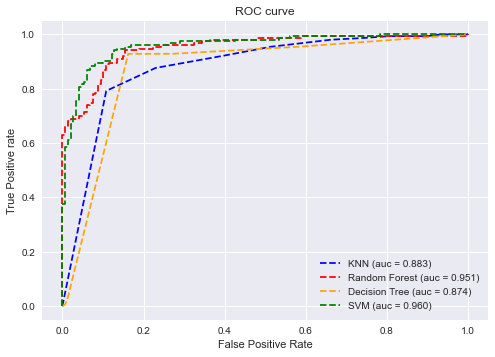

In [59]:
plt.style.use('seaborn')
FPR_knn, TPR_knn, Threshold_knn, model_auc_score_knn = calculate_roc_auc(knn_tuned,X_test,y_test)
plt.plot(FPR_knn, TPR_knn, linestyle='--',color='blue', label='KNN (auc = %0.3f)'% model_auc_score_knn )
FPR_rand, TPR_rand, Threshold_rand, model_auc_score_rand = calculate_roc_auc(rand_tuned,X_test,y_test)
plt.plot(FPR_rand, TPR_rand, linestyle='--',color='red', label='Random Forest (auc = %0.3f)'% model_auc_score_rand)
FPR_dtc, TPR_dtc, Threshold_dtc, model_auc_score_dtc = calculate_roc_auc(dtc_tuned,X_test,y_test)
plt.plot(FPR_dtc, TPR_dtc, linestyle='--',color='orange', label='Decision Tree (auc = %0.3f)'% model_auc_score_dtc)
plt.plot(svm_fpr, svm_tpr, linestyle='--',color='green',label='SVM (auc = %0.3f)' % auc_svm)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')   
plt.savefig('ROC',dpi=300)
plt.show()

In [313]:
##auc_svm = auc(svm_fpr, svm_tpr)
##decision_function tells how far point is from classification frame

In [347]:
##plt.figure(figsize=(5,5),dpi=100)
##plt.plot(svm_fpr, svm_tpr, linestyle='-',label='SVM (auc = %0.3f)' % auc_svm)

In [289]:
# predict probabilities
#pred_prob1 = rand_clf.predict_proba(X_test)
#pred_prob2 = dtc_estimator.predict_proba(X_test)

In [299]:
# roc curve for models
#fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
#fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
#random_probs = [0 for i in range(len(y_test))]
#p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [351]:


# auc scores
#auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
#auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

#print(auc_score1, auc_score2)